# Classification Models in sklearn

**Building Classifier Models to Predict House Prices in King County, USA**

**Goal:** The objective of this project is to build classifier models to predict a binary variable (price_gt_1M) that determines if the value of a house is greater than/equal to 1 million or less than 1 million. A requirement for this project is the use of sklearn pipelines that contain the preprocessing steps and the model estimation step

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Read in raw data

The data for this project can be found in `./data/kc_house_data_classification.csv`.

In [323]:
# Read csv file into panda dataframe
housing_df = pd.read_csv("./data/kc_house_data_classification.csv")

Some preliminary data prep has been completed by Prof. Mark Isken to provide the target variable in the `kc_house_data_classification.csv` file, which has been read into the `housing_df` object in this notebook. The target variable created in the data prep is `price_gt_1M` which is a binary variable:

* 1 - house price is greater than or equal to 1 million dollars
* 0 - house price is less than a million dollars

The data prep code is available in the `hw1_sklearn_dataprep.ipynb` notebook

## EDA

Introducing pandas-profiling and Sweetviz to create interactive HTML based reports. (NB: The code cells for the installation and use of pandas-profiling and Sweetviz were executed in the classic jupyter notebook)

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

### Automated EDA

Open source python libraries, **Pandas Profiling** and **Sweetviz**, are used to generate reports on exploratory data analysis of the dataset

In [ ]:
# Run cell to install latest version of pandas profiling
# pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [324]:
# Create Pandas Profiling report to the 'profile' object given the housing_df dataframe and title
profile = ProfileReport(housing_df, title="Pandas Profiling Report")

NameError: name 'ProfileReport' is not defined

In [ ]:
# Save profile report to output folder
profile.to_file("output/pandas_profiling_report.html")

The EDA report from Pandas Profiling has been stored in the output folder, `output/pandas_profiling_report.html`. A similar process is used to generate a Sweetviz report

In [326]:
# Run cell to install Sweetviz
# pip install sweetviz

In [ ]:
import sweetviz

In [ ]:
report = sweetviz.analyze(housing_df)

In [ ]:
report.show_html("output/sweetviz_report.html")

Like the pandas_profiling_report, the sweetviz_report report has been saved to the output folder. However, to view both HTML files in this notebook, run the next 2 code cells.

In [ ]:
# Display pandas_profiling_report.html in this jupyter notebook
from IPython.display import IFrame
IFrame(src="output/pandas_profiling_report.html", width=900, height=600)

In [ ]:
#Display sweetviz_report.html in this jupyter notebook 
IFrame(src="output/sweetviz_report.html", width=900, height=600)

### Exploring the target variable

In [6]:
# To get the size of each group in the target variable
housing_df.groupby(['price_gt_1M']).size()

price_gt_1M
0    20121
1     1492
dtype: int64

In [7]:
# To get the ratio of each group in the target variable
housing_df['price_gt_1M'].value_counts(normalize=True)

0    0.930967
1    0.069033
Name: price_gt_1M, dtype: float64

### Exploring categorical & numerical variables

A list of categorical and numeric variables is required to apply the appropriate pre-processing steps in the sklearn pipelines.

In [8]:
# info on dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [9]:
# view top 5 rows in dataframe
housing_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [10]:
# view last 5 rows in dataframe
housing_df.tail()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0
21612,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,0


All the variables are of numeric data type. However, some variables such as *bedrooms, bathrooms, floors, waterfront, view, condition, grade & zipcode* appear to be categorical. Further exploration of the size or count of each group present in these variables. 

In [11]:
print(housing_df.groupby(['bedrooms']).size())
print(housing_df.groupby(['bathrooms']).size())
print(housing_df.groupby(['floors']).size())
print(housing_df.groupby(['waterfront']).size())
print(housing_df.groupby(['view']).size())
print(housing_df.groupby(['condition']).size())
print(housing_df.groupby(['grade']).size())
print(housing_df.groupby(['zipcode']).size())


bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64
bathrooms
0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
dtype: int64
floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
dtype: int64
waterfront
0    21450
1      163
dtype: int64
view
0    19489
1      332
2      963
3      510
4      319
dtype: int64
condition
1       30
2      172
3    14031
4     5679
5     1701
dtype: int64
grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90


In [12]:
housing_df.groupby('bedrooms')['price_gt_1M'].value_counts()

bedrooms  price_gt_1M
0         0                11
          1                 2
1         0               198
          1                 1
2         0              2726
          1                34
3         0              9508
          1               316
4         0              6135
          1               747
5         0              1279
          1               322
6         0               217
          1                55
7         0                30
          1                 8
8         0                 9
          1                 4
9         0                 4
          1                 2
10        0                 2
          1                 1
11        0                 1
33        0                 1
Name: price_gt_1M, dtype: int64

In [13]:
housing_df['bedrooms'] = housing_df['bedrooms'].astype('category')
housing_df['bathrooms'] = housing_df['bathrooms'].astype('category')
housing_df['floors'] = housing_df['floors'].astype('category')
housing_df['waterfront'] = housing_df['waterfront'].astype('category')
housing_df['view'] = housing_df['view'].astype('category')
housing_df['condition'] = housing_df['condition'].astype('category')
housing_df['grade'] = housing_df['grade'].astype('category')
housing_df['zipcode'] = housing_df['zipcode'].astype('category')

In [14]:
housing_df.info()
print(housing_df.groupby(['zipcode']).size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  category
 1   bathrooms      21613 non-null  category
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  category
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  category
 7   condition      21613 non-null  category
 8   grade          21613 non-null  category
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  zipcode        21613 non-null  category
 14  lat            21613 non-null  float64 
 15  long           21613 non-null  float64 
 16  sqft_living15  21613 non-null  int64   
 17  sqft_lot15     21613 non-null  

In [15]:
cols=housing_df.columns.tolist()
cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_gt_1M']

In [16]:
housing_df = housing_df.loc[:, cols]
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  category
 1   bathrooms      21613 non-null  category
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  category
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  category
 7   condition      21613 non-null  category
 8   grade          21613 non-null  category
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  zipcode        21613 non-null  category
 14  lat            21613 non-null  float64 
 15  long           21613 non-null  float64 
 16  sqft_living15  21613 non-null  int64   
 17  sqft_lot15     21613 non-null  

In [17]:
categorical_cols = housing_df.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode']

In [18]:
numerical_cols = [c for c in cols if c not in categorical_cols]
numerical_cols.remove('price_gt_1M')
numerical_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [19]:
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]
X
y

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: price_gt_1M, Length: 21613, dtype: int64

In [20]:
X.dtypes

bedrooms         category
bathrooms        category
sqft_living         int64
sqft_lot            int64
floors           category
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [21]:
y.dtypes

dtype('int64')

In [22]:
cols = X.columns.tolist()

In [23]:
#Using assertion to check
assert len(cols) == len(categorical_cols) + len(numerical_cols), 'each col should either be in categorical or numeric lists'

## Logistic Regression Models

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

### Pipeline

In [26]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [27]:
y

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: price_gt_1M, Length: 21613, dtype: int64

In [42]:
print(y_train.value_counts()[0]/len(y_train))
print(y_test.value_counts()[0]/len(y_test))

0.9327356853672644
0.9238954429794124


In [29]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.9309674732799704

### Model 1: Ridge regression with C=1.0

In [43]:
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [262]:
# partition our training data into train and test sets to use for model fitting and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Fit model on new training data
clf.fit(X_train, y_train)

print(f"Training score: {clf.score(X_train, y_train):.3f}")
print(f"Test score: {clf.score(X_test, y_test):.3f}")

Training score: 0.974
Test score: 0.972


In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

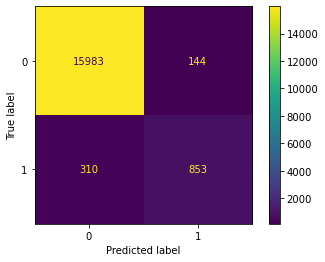

In [67]:
pred_train = clf.predict(X_train)
cm_train = confusion_matrix(y_train, pred_train, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=clf.classes_)
disp.plot()
plt.show()

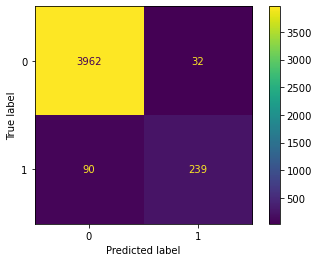

In [68]:
pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot()
plt.show()

In [59]:
clf.named_steps['classifier'].coef_.shape

(1, 150)

In [112]:
def coef_plot(model, title=None):
    if title:
        plt.title(title)
    
    plt.plot(model.steps[1][1].coef_[0])
    plt.show()

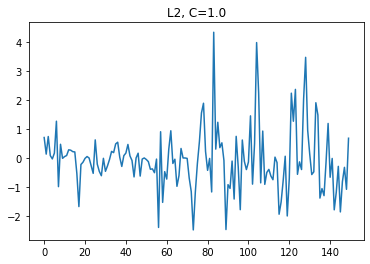

In [113]:
coef_plot(clf, 'L2, C=1.0')

### Model 2: Lasso regression with C=1.0

In [46]:
# Classifier model
clf_lasmodel_C1 = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline
clf_l1_C1 = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', clf_lasmodel_C1)])

# Fit model on training data
clf_l1_C1.fit(X_train, y_train)

print("Training score: %.3f" % clf_l1_C1.score(X_train, y_train))
print("Test score: %.3f" % clf_l1_C1.score(X_test, y_test))

Training score: 0.974
Test score: 0.970


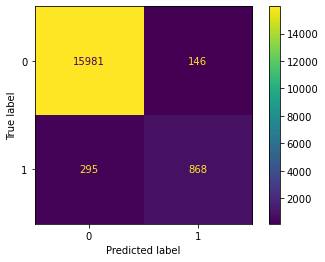

In [115]:
pred_train_M2 = clf_l1_C1.predict(X_train)
cm_train_M2 = confusion_matrix(y_train, pred_train_M2, labels=clf_l1_C1.classes_)
disp_trainM2 = ConfusionMatrixDisplay(confusion_matrix=cm_train_M2, display_labels=clf_l1_C1.classes_)
disp_trainM2.plot()
plt.show()

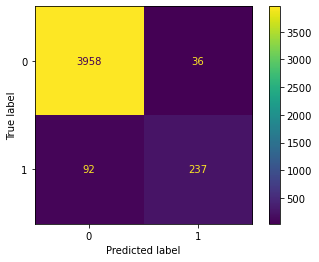

In [321]:
pred_test_M2 = clf_l1_C1.predict(X_test)
cm_test_M2 = confusion_matrix(y_test, pred_test_M2, labels=clf_l1_C1.classes_)
disp_testM2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_M2, display_labels=clf_l1_C1.classes_)
disp_testM2.plot()
plt.show()

In [134]:
clf_l1_C1.named_steps['classifier'].coef_.shape

(1, 150)

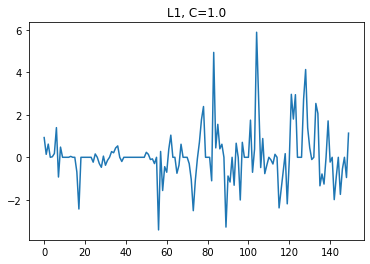

In [135]:
coef_plot(clf_l1_C1, 'L1, C=1.0')

### Model 3: Lasso regression with C=0.01

In [136]:
# Classifier model
clf_lasmodel_C01 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline
clf_l1_C01 = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', clf_lasmodel_C01)])

# Fit model on training data
clf_l1_C01.fit(X_train, y_train)

print("Training score: %.3f" % clf_l1_C01.score(X_train, y_train))
print("Test score: %.3f" % clf_l1_C01.score(X_test, y_test))

Training score: 0.954
Test score: 0.950


C:\Users\Students\anaconda3\envs\aap\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


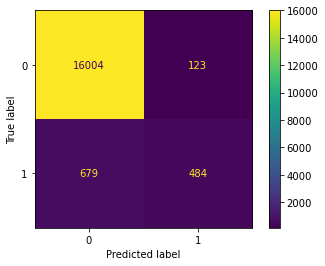

In [137]:
pred_train_M3 = clf_l1_C01.predict(X_train)
cm_train_M3 = confusion_matrix(y_train, pred_train_M3, labels=clf_l1_C01.classes_)
disp_trainM3 = ConfusionMatrixDisplay(confusion_matrix=cm_train_M3, display_labels=clf_l1_C01.classes_)
disp_trainM3.plot()
plt.show()

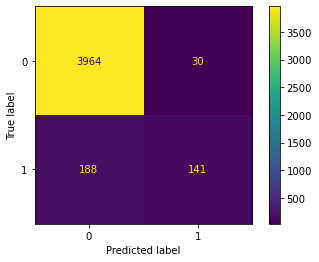

In [139]:
pred_test_M3 = clf_l1_C01.predict(X_test)
cm_test_M3 = confusion_matrix(y_test, pred_test_M3, labels=clf_l1_C01.classes_)
disp_testM3 = ConfusionMatrixDisplay(confusion_matrix=cm_test_M3, display_labels=clf_l1_C01.classes_)
disp_testM3.plot()
plt.show()

In [140]:
clf_l1_C01.named_steps['classifier'].coef_.shape

(1, 150)

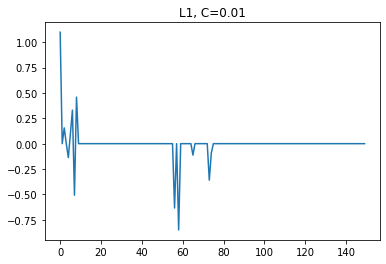

In [142]:
coef_plot(clf_l1_C01, 'L1, C=0.01')

### Model 4: Lasso Regression with optimal C value

In [182]:
# Classifier model
clf_lasmodel_CV = LogisticRegressionCV(Cs=10, penalty='l1', solver='saga', max_iter=5000)

# Append classifier to preprocessing pipeline
clf_l1_CV = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', clf_lasmodel_CV)])

# Fit model on training data
clf_l1_CV.fit(X_train, y_train)

print("Training score: %.3f" % clf_l1_CV.score(X_train, y_train))
print("Test score: %.3f" % clf_l1_CV.score(X_test, y_test))


C:\Users\Students\anaconda3\envs\aap\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Training score: 0.975
Test score: 0.971


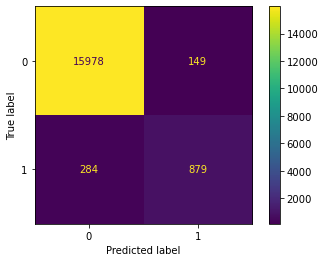

In [185]:
pred_train_M4 = clf_l1_CV.predict(X_train)
cm_train_M4 = confusion_matrix(y_train, pred_train_M4, labels=clf_l1_CV.classes_)
disp_trainM4 = ConfusionMatrixDisplay(confusion_matrix=cm_train_M4, display_labels=clf_l1_CV.classes_)
disp_trainM4.plot()
plt.show()

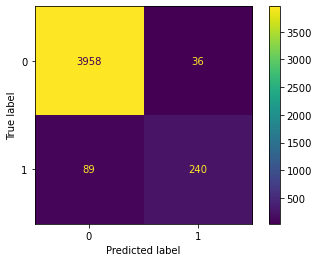

In [186]:
pred_test_M4 = clf_l1_CV.predict(X_test)
cm_test_M4 = confusion_matrix(y_test, pred_test_M4, labels=clf_l1_CV.classes_)
disp_testM4 = ConfusionMatrixDisplay(confusion_matrix=cm_test_M4, display_labels=clf_l1_CV.classes_)
disp_testM4.plot()
plt.show()

In [187]:
clf_l1_CV.named_steps['classifier'].coef_.shape

(1, 150)

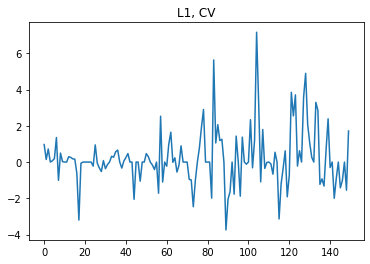

In [188]:
coef_plot(clf_l1_CV, 'L1, CV')

In [192]:
clf_l1_CV.named_steps['classifier'].Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [184]:
# clf_l1_CV.named_steps['classifier'].C_

array([2.7825594])

In [190]:
print("Optimal value of C: %.3f" % clf_l1_CV.named_steps['classifier'].C_)

Optimal value of C: 2.783


### Random forest model

In [195]:
from sklearn.ensemble import RandomForestClassifier

In [196]:
# Random forest classifier
clf_rf_class = RandomForestClassifier(oob_score=True, random_state=0)

clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', clf_rf_class)])

clf_rf.fit(X_train, y_train)
print("Random forest model score: %.3f" % clf_rf.score(X_train, y_train))
print("Random forest model score: %.3f" % clf_rf.score(X_test, y_test))

Random forest model score: 1.000
Random forest model score: 0.969


In [197]:
clf_rf.classes_

array([0, 1], dtype=int64)

In [198]:
clf_l1_CV.classes_

array([0, 1], dtype=int64)

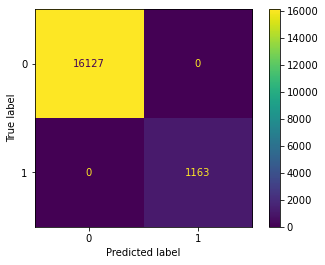

In [200]:
pred_train_rf = clf_rf.predict(X_train)
cm_train_rf = confusion_matrix(y_train, pred_train_rf, labels=clf_rf.classes_)
disp_train_rf = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=clf_rf.classes_)
disp_train_rf.plot()
plt.show()

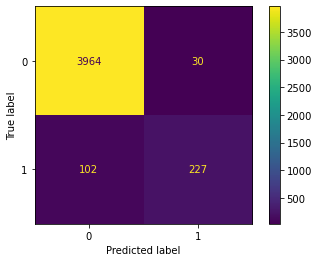

In [202]:
pred_test_rf = clf_rf.predict(X_test)
cm_test_rf = confusion_matrix(y_test, pred_test_rf, labels=clf_rf.classes_)
disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=clf_rf.classes_)
disp_test_rf.plot()
plt.show()

### Task 6 - a little error exploration

In [284]:
housing_reg_df = pd.read_csv("./data/kc_house_data_regression.csv")

In [285]:
housing_reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  price          21613 non-null  float64
dtypes: flo

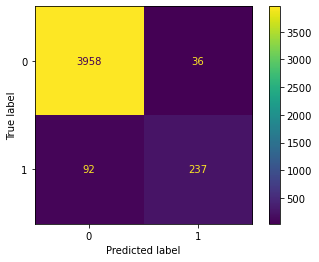

In [322]:
pred_test_M2 = clf_l1_C1.predict(X_test)
cm_test_M2 = confusion_matrix(y_test, pred_test_M2, labels=clf_l1_C1.classes_)
disp_testM2 = ConfusionMatrixDisplay(confusion_matrix=cm_test_M2, display_labels=clf_l1_C1.classes_)
disp_testM2.plot()
plt.show()

In [290]:
df2 = pd.DataFrame(y_test)
df2

,price_gt_1M
13473,0
9626,0
21376,0
9036,0
1007,0
...,...
662,0
16297,0
1390,0
3546,0


In [310]:
df3 = pd.DataFrame(pred_test_M2, index=df2.index)
df3

,0
13473,0
9626,0
21376,0
9036,0
1007,0
...,...
662,0
16297,0
1390,0
3546,0


In [311]:
df1 = pd.DataFrame(housing_reg_df.iloc[:,17])
df1

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [317]:
df_join = df1.merge(df2, how='inner', left_index=True, right_index=True)
df_join

,price,price_gt_1M
0,221900.0,0
4,510000.0,0
5,1225000.0,1
10,662500.0,0
18,189000.0,0
...,...,...
21587,385000.0,0
21595,520000.0,0
21599,810000.0,0
21601,467000.0,0


In [318]:
df_join = df_join.merge(df3, how='inner', left_index=True, right_index=True)
df_join

,price,price_gt_1M,0
0,221900.0,0,0
4,510000.0,0,0
5,1225000.0,1,1
10,662500.0,0,0
18,189000.0,0,0
...,...,...,...
21587,385000.0,0,0
21595,520000.0,0,0
21599,810000.0,0,0
21601,467000.0,0,0


In [319]:
wrong_price = df_join.loc[df_join['price_gt_1M'] != df_join[0]]
wrong_price

,price,price_gt_1M,0
49,1350000.0,1,0
393,927000.0,0,1
446,1030000.0,1,0
489,1280000.0,1,0
679,1145000.0,1,0
...,...,...,...
20816,1105000.0,1,0
21143,1085000.0,1,0
21179,1050000.0,1,0
21375,1174660.0,1,0


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

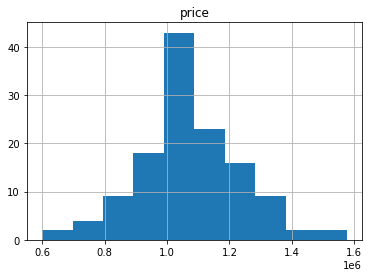

In [320]:
wrong_price.hist(column = 'price')

0